### 내가 푼 답안

수정 금지) 아래는 예제 데이터를 불러오는 코드입니다.
- user_data 에 대한 설명은 다음과 같습니다.
  - user_id: 유저별 unique ID
  - session_id: 유저의 세션 ID
  - date: event 발생 날짜

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 수정 금지: 데이터셋 준비 #
a = (1051,1051,1051,1051,1051,2073,2073,2073,2073,3063,3063,3063,3053,3024,3024)
b = ('aBxD','aBxD','aBxD','aBxD','aBxD','bDbD','bDbD','bDbC','bDbC','aaaa','aaab','aaac', '5DaD','aDDD','aDDE')
c = ('2021-10-31','2021-10-31','2021-10-31','2021-11-01','2021-11-01','2021-10-31','2021-10-31','2021-10-30', '2021-10-29','2021-11-07','2021-11-08','2021-11-09','2021-11-09','2021-11-09','2021-11-10')
user_data = pd.DataFrame({"user_id":a, "session_id":b, "date": c})

### 1. 평균 Daily Active User 를 구해서 avg_active_user라는 변수에 저장하시오. 

- 제약사항
  - 위의 user_data 의 기간 전체를 사용합니다
  - 단 유저가 방문하지 않은 날짜는 제외(무시)하고 DAU를 구하시오
  - avg_active_user 은 DataFarame이 아닌 숫자(float)로 저장되어야 합니다.

In [3]:
### 여기에 코드를 입력해 주세요 ####
user_data['event_date'] = user_data['date'].str.slice(start=0, stop =10)
user_data['evert_date_dtm_format'] = pd.to_datetime(user_data['event_date'], format="%Y-%m-%d")

avg_active_user = user_data.groupby('event_date')['user_id'].nunique()

In [4]:
avg_active_user

event_date
2021-10-29    1
2021-10-30    1
2021-10-31    2
2021-11-01    1
2021-11-07    1
2021-11-08    1
2021-11-09    3
2021-11-10    1
Name: user_id, dtype: int64

### 2. 11월 한 달 동안의 DAU/MAU 지표를 구하시오
- user_data 를 사용합니다
- 단, 유저가 방문하지 않는 날짜는 제외(무시)하고, DAU를 구하시오

In [5]:
user_data['event_date'] = user_data['date'].str.slice(start=0, stop =10)
user_data['event_date_dtm_format'] = pd.to_datetime(user_data['event_date'], format="%Y-%m-%d")

november_data = user_data.loc[(user_data['event_date'] > '2021-10-31')]
november_data

,user_id,session_id,date,event_date,evert_date_dtm_format,event_date_dtm_format
3,1051,aBxD,2021-11-01,2021-11-01,2021-11-01,2021-11-01
4,1051,aBxD,2021-11-01,2021-11-01,2021-11-01,2021-11-01
9,3063,aaaa,2021-11-07,2021-11-07,2021-11-07,2021-11-07
10,3063,aaab,2021-11-08,2021-11-08,2021-11-08,2021-11-08
11,3063,aaac,2021-11-09,2021-11-09,2021-11-09,2021-11-09
12,3053,5DaD,2021-11-09,2021-11-09,2021-11-09,2021-11-09
13,3024,aDDD,2021-11-09,2021-11-09,2021-11-09,2021-11-09
14,3024,aDDE,2021-11-10,2021-11-10,2021-11-10,2021-11-10


2-2) november_data를 이용하여, 11월 평균 DAU를 구한 후 dau_11 변수에 저장합니다. 
- dau_11은 숫자(float)여야 합니다.

In [6]:
### 여기에 코드를 입력해 주세요 ####
dau_11 = november_data.groupby('event_date')['user_id'].nunique()
dau_11

event_date
2021-11-01    1
2021-11-07    1
2021-11-08    1
2021-11-09    3
2021-11-10    1
Name: user_id, dtype: int64

2-3) november_data를 이용하여, 11월 MAU를 구한 후 mau_11 변수에 저장합니다. 

In [7]:
### 여기에 코드를 입력해 주세요 #### 

november_data['event_month'] = november_data['date'].str.slice(start=0, stop=7)

mau_11 = november_data.groupby('event_month')['user_id'].nunique()
mau_11

<ipython-input-7-96ca3b0ff140>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  november_data['event_month'] = november_data['date'].str.slice(start=0, stop=7)


event_month
2021-11    4
Name: user_id, dtype: int64

2-4) 앞에서 구한 지표를 바탕으로 11월 1달 DAU/MAU 를 구하여 dau_mau_11 변수에 저장합니다. 

In [8]:
### 여기에 코드를 입력해 주세요 ####
dau_dt = pd.DataFrame({'event_date': dau_11.index, 'user_count':dau_11.values})

mau_dt = pd.DataFrame({'event_date': mau_11.index, 'user_count':mau_11.values})

avg_daily_user = dau_dt.user_count.mean()
avg_month_user = mau_dt.user_count.mean()

dau_mau_11 = avg_daily_user / avg_month_user
print(dau_mau_11)

0.35


### 3. 다음 데이터를 가지고 코호트 분석을 위한 히트맵 그래프를 만들어 주세요 

아래 제약 사항을 잘 읽어 주세요.
- 기간:  2021-01 ~ 2021-05월
- 분석 목적: 해당 기간 동안 기간 별 **재방문율 변화**를 파악합니다.
- 그래프 크기: 그래프 크기는 (9, 7) 입니다. 
- 그래프 내 값은 백분율로 **%를 포함하여 소숫점 2자리**까지 그려주세요.
- **첫 방문월도 포함**하여 그래프를 그려주세요.

cohort_data 에 대한 컬럼 설명 안내
- first_visit_month : 유저의 첫 방문월
- revisit_month: 재방문월
- user_cnt: 각 첫 방문월/재방문월 별 유저수

In [10]:
## 수정 금지) 데이터셋 준비 ## 
a = ('2021-01','2021-01','2021-01','2021-01','2021-01','2021-02', '2021-02','2021-02','2021-02','2021-03','2021-03','2021-03','2021-04','2021-04','2021-05')
b = ('2021-01','2021-02','2021-03','2021-04','2021-05','2021-02', '2021-03','2021-04','2021-05','2021-03','2021-04','2021-05','2021-04','2021-05','2021-05')
c = (100,80,60,40,10,96, 55,33,11,90,20,10,120,5,1)
cohort_data = pd.DataFrame({"first_visit_month":a, "revisit_month":b, "user_cnt": c})

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


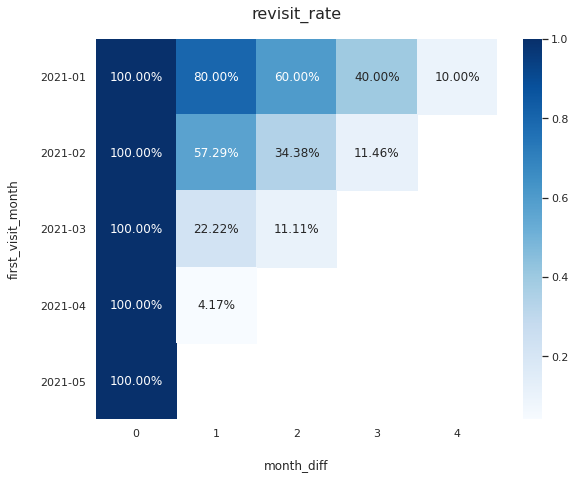

In [11]:
### 여기에 코드를 입력해 주세요 ####

import matplotlib.pyplot as plt
import seaborn as sns

cohort_data['first_visit_month_dt'] = pd.to_datetime(cohort_data.first_visit_month, format = '%Y-%m')
cohort_data['revisit_month_dt'] = pd.to_datetime(cohort_data.revisit_month, format = '%Y-%m')

cohort_data['month_diff'] =  cohort_data.revisit_month_dt.dt.to_period('M').astype('int') - cohort_data.first_visit_month_dt.dt.to_period('M').astype('int')

cohort_data = cohort_data[['first_visit_month','month_diff','user_cnt']]
cohort_data.set_index(['first_visit_month','month_diff'],inplace=True)
cohort_data.head()

cohort_data = cohort_data['user_cnt'].unstack(1)
cohort_data

revisit_rate = cohort_data.divide(cohort_data[0],axis=0)
revisit_rate

revisit_rate.iloc[:, :]

sns.set_theme(style="whitegrid", palette="pastel") 
plt.rc('font', family='NanumBarunGothic') 


g = sns.heatmap(revisit_rate.iloc[:, :], annot=True, fmt='.2%', cmap="Blues")

g.figure.set_size_inches(9, 7) 
g.set_title("revisit_rate", pad=20, size=16) 
g.set_xlabel("month_diff",labelpad = 20, size = 12)
g.set_ylabel("first_visit_month",labelpad = 20, size = 12) 
sns.set_theme(style="whitegrid", palette="pastel")

### 예시 답안

In [12]:
### 여기에 코드를 입력해 주세요 ####
test = user_data.groupby('date')['user_id'].nunique()
dau_data = pd.DataFrame({'date':test.index, 'user_count':test.values})
avg_active_user = dau_data['user_count'].mean()
avg_active_user

1.375

In [13]:
november_data = user_data.loc[user_data.date >= '2021-11-01', :]
november_data

,user_id,session_id,date,event_date,evert_date_dtm_format,event_date_dtm_format
3,1051,aBxD,2021-11-01,2021-11-01,2021-11-01,2021-11-01
4,1051,aBxD,2021-11-01,2021-11-01,2021-11-01,2021-11-01
9,3063,aaaa,2021-11-07,2021-11-07,2021-11-07,2021-11-07
10,3063,aaab,2021-11-08,2021-11-08,2021-11-08,2021-11-08
11,3063,aaac,2021-11-09,2021-11-09,2021-11-09,2021-11-09
12,3053,5DaD,2021-11-09,2021-11-09,2021-11-09,2021-11-09
13,3024,aDDD,2021-11-09,2021-11-09,2021-11-09,2021-11-09
14,3024,aDDE,2021-11-10,2021-11-10,2021-11-10,2021-11-10


In [14]:
dau = november_data.groupby('date')['user_id'].nunique()
dau_data = pd.DataFrame({'date':dau.index, 'user_count':dau.values})
dau_11 = dau_data['user_count'].mean()
dau_11

1.4

In [15]:
### 여기에 코드를 입력해 주세요 #### 
mau_11 = november_data['user_id'].nunique()
mau_11

4

In [16]:
### 여기에 코드를 입력해 주세요 ####
dau_mau_11 = dau_11/mau_11
dau_mau_11

0.35

In [ ]:
### 여기에 코드를 입력해 주세요 ####

# 기간을 diff 로 나타냅니다.
cohort_data["first_visit_month_dt"] = pd.to_datetime(cohort_data.first_visit_month, format='%Y-%m')
cohort_data["revisit_month_dt"] = pd.to_datetime(cohort_data.revisit_month, format='%Y-%m')


cohort_data['month_diff'] = (
     cohort_data.revisit_month_dt.dt.to_period('M').astype(int) 
     - cohort_data.first_visit_month_dt.dt.to_period('M').astype(int)
)
 

# matrix 로 변환합니다.
visit_cohorts = cohort_data[['first_visit_month','month_diff','user_cnt']]
visit_cohorts.set_index(['first_visit_month','month_diff'],inplace=True)
visit_cohorts = visit_cohorts['user_cnt'].unstack(1)
revisit_rate=visit_cohorts.divide(visit_cohorts[0],axis=0)

# 그래프를 그립니다.
sns.set_theme(style="whitegrid", palette="pastel")
g = sns.heatmap(revisit_rate, annot=True, fmt='.2%', cmap="Blues")
g.figure.set_size_inches(9, 7) 